Solution to Parallel Parking Riddler puzzle 
by Mark Mace
<br>
From
<url>
https://fivethirtyeight.com/features/can-you-parallel-park-your-car/
</url>
<br>
<br>
Original prompt:

<br>
<i>
Every weekend, I drive into town for contactless curbside pickup at a local restaurant. Across the street from the restaurant are six parking spots, lined up in a row.

While I can parallel park, it’s definitely not my preference. No parallel parking is required when the rearmost of the six spots is available or when there are two consecutive open spots. If there is a random arrangement of cars currently occupying four of the six spots, what’s the probability that I will have to parallel park?
</i>

In [94]:
import numpy as np
import random 
import matplotlib.pyplot as plt

In [62]:
# number of spaces
n_spaces_to_park = 6
# number of cars parked
n_cars_parked = 4
          

In [67]:
# define functions 

def check_for_double_space(list_of_occupied_spaces,
                           n_spaces,
                           n_cars):
    """
    Check that there are no pairs of consequtive spaces open by looking at 
    a sorted list of occupied spaces combined with the next occupied space.
    We then evaluate the difference in space numbering, checking if they
    are consequtive or not.
    """
    list_of_occupied_spaces = sorted(list_of_occupied_spaces)
    
    # case that first two or last two spaces are open
    if list_of_occupied_spaces[0] == n_spaces - len(list_of_occupied_spaces) or list_of_occupied_spaces[-1] == len(list_of_occupied_spaces) - 1:
        return True
    
    # check for two car gaps
    for space_1, space_2 in zip(list_of_occupied_spaces, list_of_occupied_spaces[1:]):
        if space_2 - space_1 == n_spaces - n_cars + 1:
            return False
        else:
            return True


def check_need_to_parallel_park(list_of_occupied_spaces,
                                n_spaces,
                                n_cars):
    """
    Check if you will have to parallel park given a list of space numbers for occupied 
    parking spaces. Checks for if the last spot in the list is occupied, and if there are
    two consequtive spaces.
    """
    if n_spaces-1 not in list_of_occupied_space:
        return True
    elif check_for_double_space(list_of_occupied_spaces=list_of_occupied_spaces, n_spaces=n_spaces, n_cars=n_cars):
        return True
    else:
        return False

In [103]:
# We look for the value as the statistics becoming 'infinitely good'
# e.g. when the quantities like mean and standard error of the mean
# no longer depend on the number of sampled car parking configurations
# considered. We take a list of values and check that the results convege

list_of_sample_values = [2**n for n in range(8, 26, 2)]

In [107]:
list_of_results = []
for n_samples in list_of_sample_values:
    car_config = [check_need_to_parallel_park(list_of_occupied_spaces=random.sample(list(range(n_spaces_to_park)), n_cars_parked), n_spaces=n_spaces_to_park, n_cars=n_cars_parked) for _ in range(n_samples)]
    mean_success_rate = np.mean(car_config)
    std_err_of_mean = np.std(car_config)/np.sqrt(len(car_config) - 1)
    print(f'Number of samples: {n_samples}')
    list_of_results.append([n_samples, mean_success_rate, std_err_of_mean])
    print(f'Fraction of time where you can park: {round(mean_success_rate, 5)} +/- {round(std_err_of_mean, 5)}')
    

Number of samples: 256
Fraction of time where you can park: 0.90625 +/- 0.01825
Number of samples: 1024
Fraction of time where you can park: 0.93066 +/- 0.00794
Number of samples: 4096
Fraction of time where you can park: 0.93359 +/- 0.00389
Number of samples: 16384
Fraction of time where you can park: 0.93481 +/- 0.00193
Number of samples: 65536
Fraction of time where you can park: 0.93442 +/- 0.00097
Number of samples: 262144
Fraction of time where you can park: 0.93311 +/- 0.00049
Number of samples: 1048576
Fraction of time where you can park: 0.93322 +/- 0.00024
Number of samples: 4194304
Fraction of time where you can park: 0.93331 +/- 0.00012
Number of samples: 16777216
Fraction of time where you can park: 0.93333 +/- 6e-05


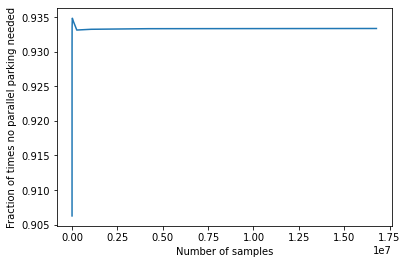

In [130]:
# plot convergence
list_of_results=np.array(list_of_results)
list_of_results_sorted=list_of_results[list_of_results[:,0].argsort()]

plt.figure()
plt.plot(list_of_results_sorted[:,0], list_of_results_sorted[:,1])
plt.xlabel('Number of samples')
plt.ylabel('Fraction of times no parallel parking needed')
plt.show()